<a href="https://colab.research.google.com/github/konradVEH/CHL5230/blob/Datathon-1-(Week-2)/MLDatathonWeek2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Datathon Week #2**
<b> Team: </b> Konrad Samsel, Karanbir Brar, Hongyan Chen<br>
<b> Student Numbers </b> 1004041967, ...,1010528010<br>
<b> Team Number: </b> 9<br>
<b> Course: </b> CHL5239 Fall 2023<br>
<b> Date: </b> 2023-09-19 <br>
<br>

<h5> <b> Basic Features of Data Analysis Project:</b></h5>
<b> Dataset: </b> Public Health Factors Influencing BMI<br>
<b> Outcome of Interest: </b> BMI (Categorical)<br>
<b> Proposed ML Model: </b> K-Nearest Neighbour


# Part 1: Import Data



In [ ]:
# Import libraries
from google.colab import files
import os
import numpy as np
import plotly.express as px
import seaborn as sns

#Import Libraries - KNN Lecture
from sklearn.utils.extmath import weighted_mode
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the desired file path (name)
file_path = '/content/1-Dataset1.csv'

# Check if the file exists in the specified path
if not os.path.exists(file_path):
    # File doesn't exist; upload it
    uploaded = files.upload()

    # Save the uploaded file to the specified path
    for filename in uploaded.keys():
        os.rename(filename, file_path)

# Load the data
df = pd.read_csv(file_path)
df.head()


Saving CHL5230-F23-Datathon #1-Dataset1.csv to CHL5230-F23-Datathon #1-Dataset1.csv


,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


# Part 2: Descriptive Analysis and Pre-Processing

**2.1.Descriptive Statistics and Analysis**

We will begin by identifying any missing data in our dataset, to identify if there are variables that have a significant proportion of missing data and therefore cannot be used. We will also describe our data further by identifying the distribution of each predictor variable, identifying mean and standard deviation/IQR for continuous variables, and proportions of each level for categorical variables.


In [ ]:
### Descriptive Analysis PART 1 ==========================
### DATA TYPES, MISSING VALUES, BASIC DESCRIPTIVES

#Get shape of df
print(df.shape) # there are 23535 ROWS and 10 COLUMNS

# Display the column names, data types of each columnm, and explore for NA values
print(df.info()) # No NA/Null
print(df.isna().sum()) #double-check for NA val using another funct. No NAs

#Do a descriptive analysis of all variables (numerical and categorical)
print(df.describe(include='all'))

(23535, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23535 entries, 0 to 23534
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  23535 non-null  int64  
 1   Gender               23535 non-null  object 
 2   Calorie_Intake       23535 non-null  int64  
 3   Sugar_Intake         23535 non-null  int64  
 4   Physical_Activity    23535 non-null  int64  
 5   Fast_Food_Frequency  23535 non-null  int64  
 6   Screen_Time          23535 non-null  int64  
 7   Height               23535 non-null  float64
 8   Weight               23535 non-null  float64
 9   BMI                  23535 non-null  float64
dtypes: float64(3), int64(6), object(1)
memory usage: 1.8+ MB
None
Age                    0
Gender                 0
Calorie_Intake         0
Sugar_Intake           0
Physical_Activity      0
Fast_Food_Frequency    0
Screen_Time            0
Height                 0
Weight      

In [ ]:
### Descriptive Analysis PART 2 ================================================
### POPULATION DISTRIBUTION & OUTLIERS

#I would like to check for MINORITY BIAS: Certain groups being underrepresented in the data

#1-Way Cross Tabulation by Gender & Gender Specific Average Age ----------------
# Are both genders represented in the data?

# Using groupby to calculate the average age by gender
avg_age_by_sex = df.groupby('Gender')['Age'].mean().reset_index()
# Create an interactive donut chart
fig_donut = px.pie(avg_age_by_sex, names='Gender', values='Age', title='Average Age by Gender', hole=0.5)
# Customizing the color and theme
fig_donut.update_traces(textinfo='percent+label', pull=[0, 0], marker=dict(colors=['#0d7b94', '#82153d']))
fig_donut.update_layout(template="plotly_white")
# Show the plot
fig_donut.show(renderer="colab")
#Are males and females represented in sufficient numbers? YES

#Distribution of Age by Gender -------------------------------------------------
# Are different ages, across gender, represented in the data?

fig_box = px.box(df, x='Gender', y='Age', title='Box Plot of Age Grouped by Gender',
                 color='Gender', points="outliers", color_discrete_sequence=['#82153d', '#0d7b94'])
fig_box.update_layout(template="plotly_white")
fig_box.show()
#See that age is similar by gender, no outliers, approximately normally distributed (could use Q-Q plot to verify)

#Distribution of BMI by Gender -------------------------------------------------
# Are different levels of BMI, across gender, represented in the data?

fig_box_bmi = px.box(df, x='Gender', y='BMI', title='Box Plot of BMI Grouped by Gender',
                 color='Gender', points="outliers", color_discrete_sequence=['#82153d', '#0d7b94'])
fig_box_bmi.update_layout(template="plotly_white")
fig_box_bmi.show()
#See high BMI, potential outlier, however up to BMI:79 has been seen in NHANES (PMC5543370)

# Create a box plot for 'Calorie_Intake' with outliers
fig_box_calorie = px.box(df, x='Calorie_Intake', title='Box Plot of Calorie Intake', points="outliers", color_discrete_sequence=['#82153d'])
fig_box_calorie.update_layout(template="plotly_white")
fig_box_calorie.show()

# Create a box plot for 'Sugar_Intake' with outliers
#fig_box_sugar = px.box(df, x='Sugar_Intake', title='Box Plot of Sugar Intake', points="outliers", color_discrete_sequence=['#0d7b94'])
#fig_box_sugar.update_layout(template="plotly_white")
#fig_box_sugar.show()

# Create a box plot for 'Physical_Activity' with outliers
fig_box_activity = px.box(df, x='Physical_Activity', title='Box Plot of Physical Activity', points="outliers", color_discrete_sequence=['#ff5733'])
fig_box_activity.update_layout(template="plotly_white")
fig_box_activity.show()




**2.2 Pre-Process the Data**


   Age  Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0   56       0            3091            90                160   
1   69       0            2090           106                 27   
2   46       1            2938            11                 45   
3   32       0            3022            48                112   
4   60       0            2350            83                115   

   Fast_Food_Frequency  Screen_Time    Height     Weight        BMI  \
0                    4            1  1.569070  81.199394  32.981343   
1                    0            9  1.629449  74.273566  27.973877   
2                    2            3  1.637726  71.453466  26.640417   
3                    1            8  1.514198  98.163045  42.813720   
4                    0            7  1.410559  57.323914  28.810685   

    BMI_Class  
0       Obese  
1  Overweight  
2  Overweight  
3       Obese  
4  Overweight  


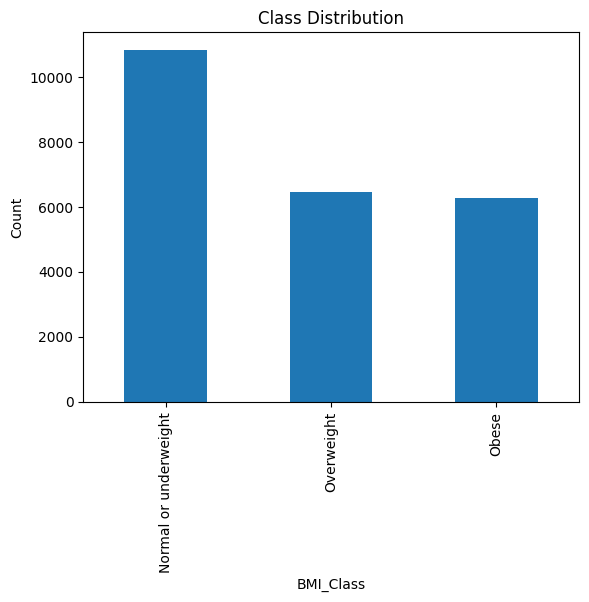

Normal or underweight    10835
Overweight                6444
Obese                     6256
Name: BMI_Class, dtype: int64


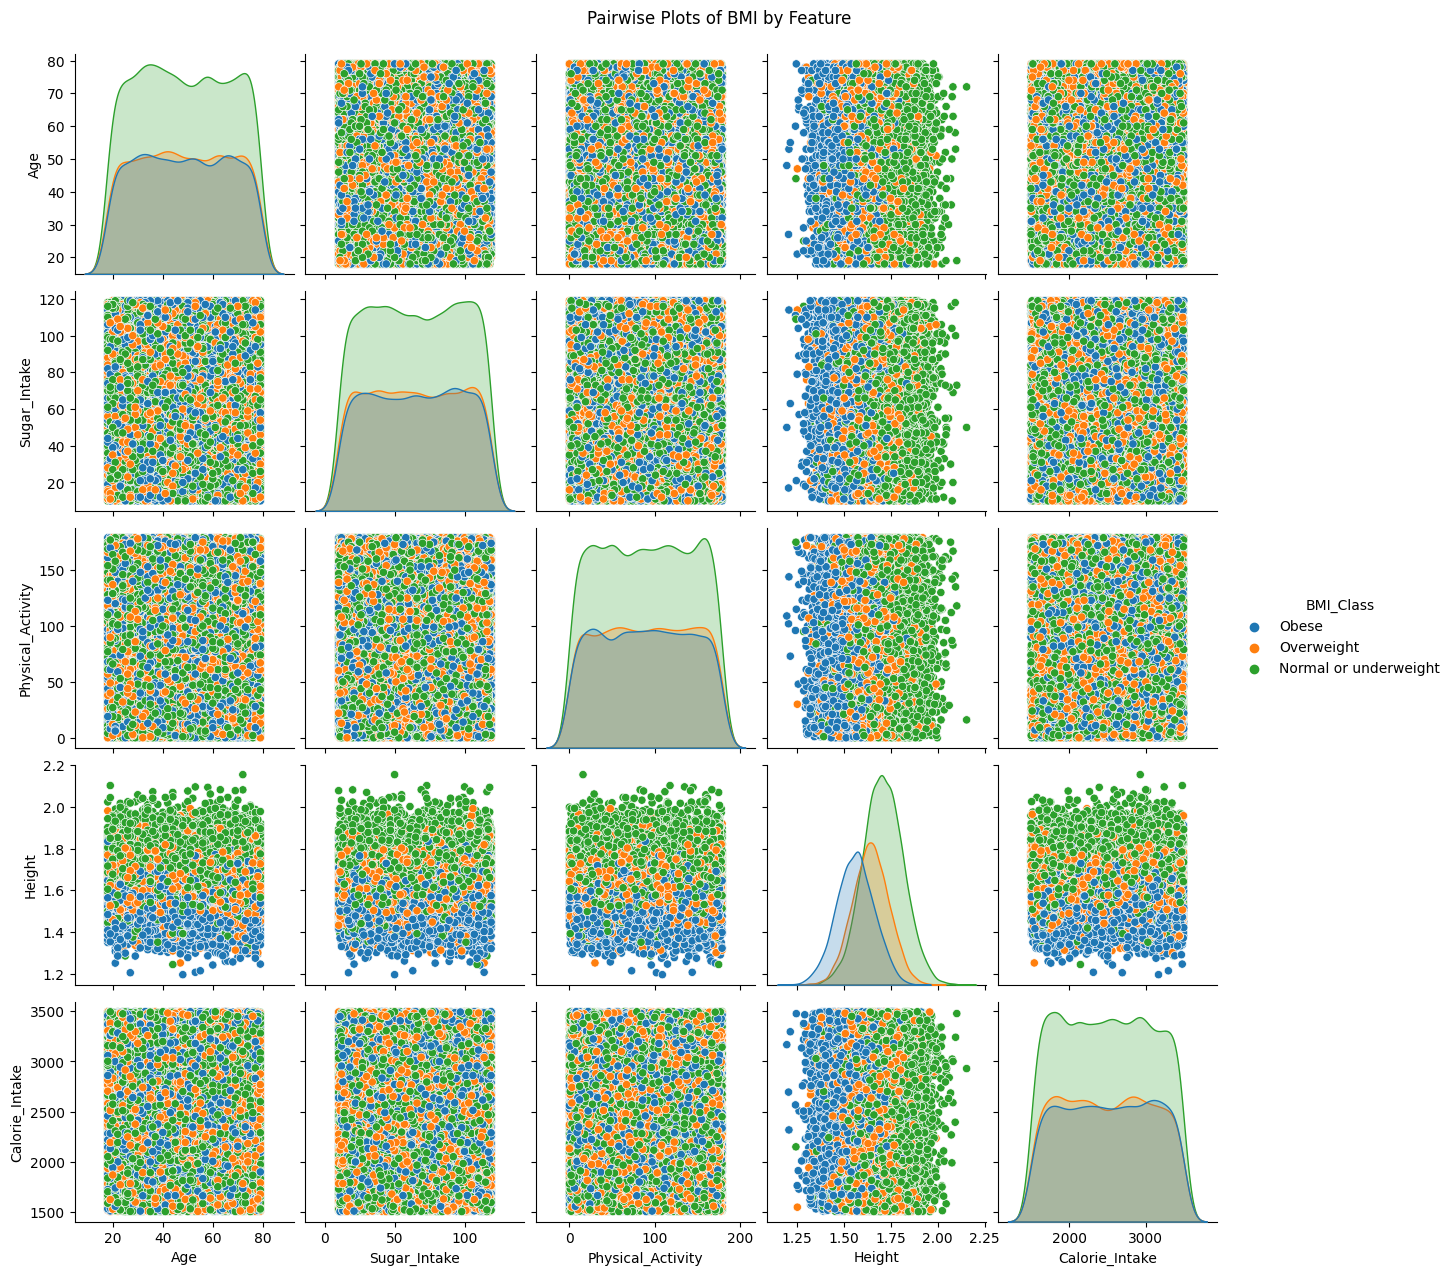

In [ ]:
#Encode Gender into binary variable
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male: 1, Female: 0   Encoding 'Gender' column

#Encode BMI into categorical variable
def BMI_CLASS (BMI: float) -> str:
  if BMI < 18.5:
    return 'Normal or underweight'
  elif (18.5 <= BMI < 25):
    return 'Normal or underweight'
  elif (25 <= BMI < 30):
    return "Overweight"
  elif (30 <= BMI < 35):
    return "Obese"
  elif (35 <= BMI < 40):
    return "Obese"
  else:
    return "Obese"

# def BMI_CLASS (BMI: float) -> str:
#   if BMI < 25:
#     return 'Not_Overweight'
#   else:
#     return 'Overweight'

df['BMI_Class'] = df['BMI'].apply(BMI_CLASS)

# df['BMI_Cat'] = df['BMI_Class'].replace({'Underweight': 0, 'Healthy': 1, 'Overweight': 0, 'Obese': 0})
#df['BMI_cat'] = df['BMI_class'].replace({'Underweight': 0, 'Healthy': 1, 'Overweight': 2, 'Obese': 3})

print(df.head())

class_counts = df['BMI_Class'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('BMI_Class')
plt.ylabel('Count')
plt.show()
print(class_counts)

# Pairplot to visualize relationships between different features
continuous_columns = ['BMI_Class', 'Age', 'Sugar_Intake', 'Physical_Activity', 'Height', 'Calorie_Intake']
df_continuous = df[continuous_columns]
sns.pairplot(df_continuous, hue='BMI_Class')
plt.suptitle("Pairwise Plots of BMI by Feature", y=1.02)
plt.show()




In [ ]:
#split data into features and label
X = df[['Age', 'Gender', 'Calorie_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', 'Height']]
y = df['BMI_Class']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Choose a range of k values to test. In this case, we'll test values from 1 to 49.
k_values = range(1, 50)

# A list to keep track of the error rates for each k value.
errors = []


# Loop over k_values to train and test the KNN classifier
for k in k_values:
    # Initialize a KNN classifier with current k value.
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data.
    knn.fit(X_train, y_train)

    # Predict the labels for the test set.
    y_pred = knn.predict(X_test)

    # Calculate the error rate: 1 - accuracy.
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)


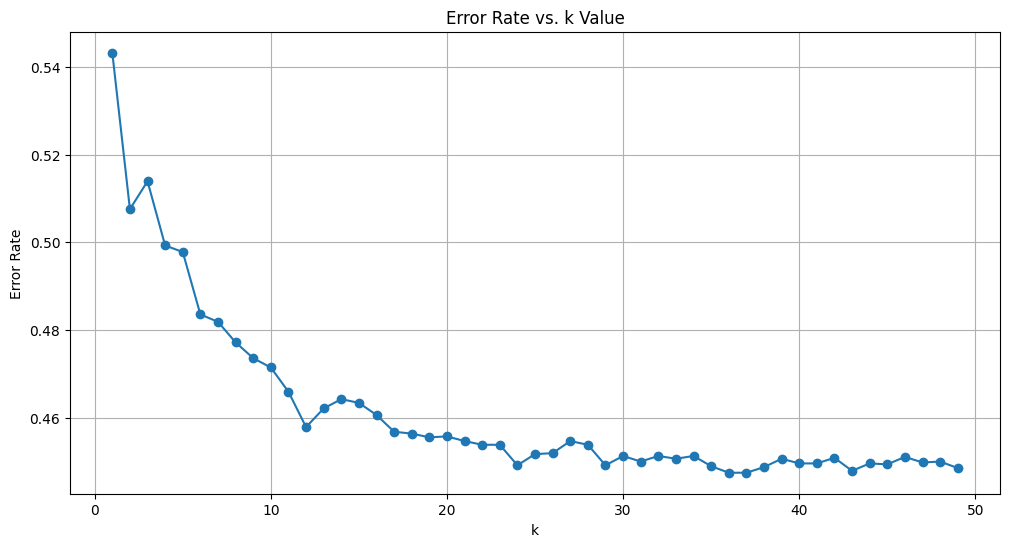

In [ ]:
# Plotting
# This visualization helps in understanding the relationship between k value and the error rate.
plt.figure(figsize=(12, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

[[1710  243  222]
 [ 436  611  197]
 [ 762  295  231]]
                       precision    recall  f1-score   support

Normal or underweight       0.59      0.79      0.67      2175
                Obese       0.53      0.49      0.51      1244
           Overweight       0.36      0.18      0.24      1288

             accuracy                           0.54      4707
            macro avg       0.49      0.49      0.47      4707
         weighted avg       0.51      0.54      0.51      4707



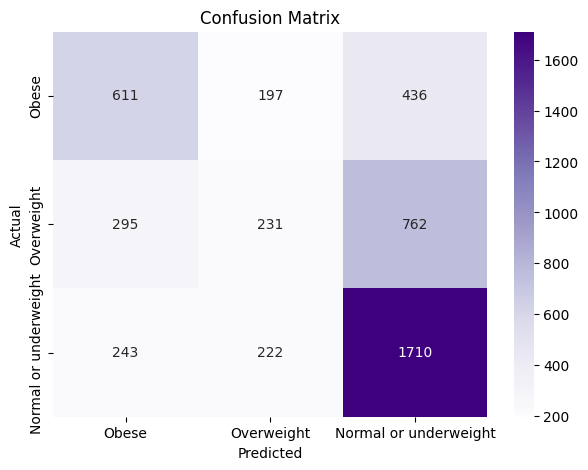

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)  # Setting K to 5 as an example
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#plotting confusion matrix
classes = df['BMI_Class'].unique()

plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# END OF SUBMISSION
Misc Code Below

In [ ]:
## EXPLORING ANOTHER RELATIONSHIP
# High Sugar Intake
# df['Sugar_Intake_Category'] = ['High Sugar Intake' if x > (0.03 * y) else 'Low Sugar Intake' for x, y in zip(df['Sugar_Intake'], df['Calorie_Intake'])]


df['Sugar_Intake_Category'] = ['High Sugar Intake' if x > 60 else 'Low Sugar Intake' for x in df['Sugar_Intake']]


print(df.head())

class_counts = df['Sugar_Intake_Category'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Sugar_Intake_Category')
plt.ylabel('Count')
plt.show()
print(class_counts)


# Pairplot to visualize relationships between different features
continuous_columns = ['Sugar_Intake_Category', 'Age', 'Physical_Activity', 'BMI', 'Calorie_Intake']
df_continuous = df[continuous_columns]
sns.pairplot(df_continuous, hue='Sugar_Intake_Category')
plt.suptitle("Pairwise Plots of Sugar Instake by Feature", y=1.02)
plt.show()

#split data into features and label
X = df[['Age', 'Gender', 'Calorie_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', 'BMI']]
y = df['Sugar_Intake_Category']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




NameError: ignored

In [ ]:
# Choose a range of k values to test. In this case, we'll test values from 1 to 49.
k_values = range(1, 50)

# A list to keep track of the error rates for each k value.
errors = []


# Loop over k_values to train and test the KNN classifier
for k in k_values:
    # Initialize a KNN classifier with current k value.
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data.
    knn.fit(X_train, y_train)

    # Predict the labels for the test set.
    y_pred = knn.predict(X_test)

    # Calculate the error rate: 1 - accuracy.
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)

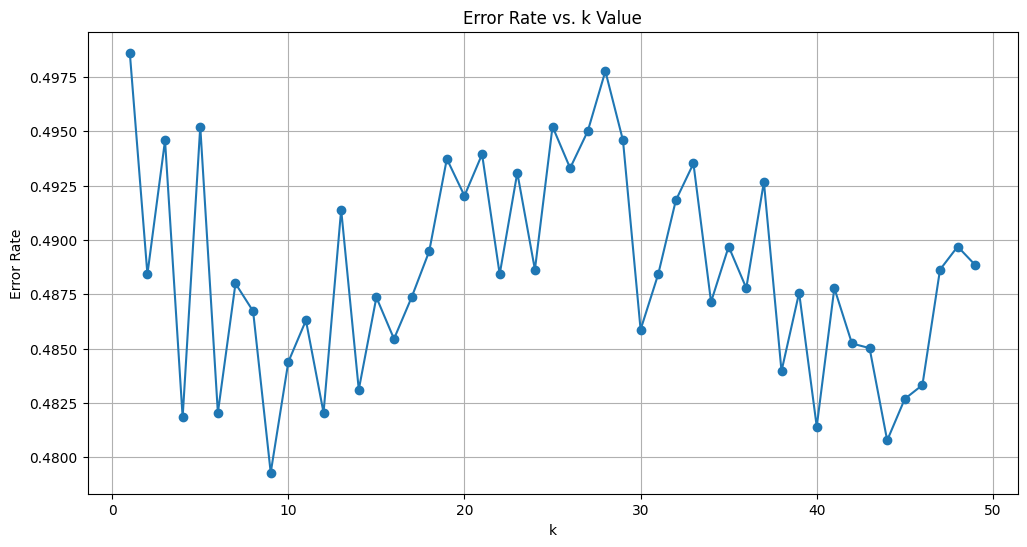

In [ ]:
# Plotting
# This visualization helps in understanding the relationship between k value and the error rate.
plt.figure(figsize=(12, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

In [ ]:

#PREVIOUS CODE
# Import libraries
from google.colab import files
import os
import numpy as np
import plotly.express as px
import seaborn as sns

#Import Libraries - KNN Lecture
from sklearn.utils.extmath import weighted_mode
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


df=pd.read_csv("/content/1-Dataset1.csv")                    #Load the Data
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])                 # Male: 1, Female: 0   Encoding 'Gender' column


x = df[['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake',
        'Physical_Activity','Fast_Food_Frequency','Screen_Time','Height','Weight','BMI']]
print(x)
y = df['BMI_class']                                #split the data into training and testing sets
def panduan(BMI):
  if BMI <18.5:
    return 'Underweight'
  elif (BMI >= 18.5) & (BMI < 24.9): #You'll have edge cases here, **KS, also reccomend using elif otherwise it will return most recent if statement met
    return 'Healthy Weight'
  else:
    return 'Obese'
df['BMI_class']=df.apply(lambda x:panduan(x['BMI']))



###
data = pd.DataFrame(data=x, columns=y)
data['Class'] = [iris.target_names[i] for i in iris.target]       # Convert dataset to DataFrame

# Data Summary
print(data.describe())

# Countplot to visualize the distribution of the three species
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='species')
plt.title("Distribution of Iris Species")
plt.show()

# Pairplot to visualize relationships between different features
sns.pairplot(data, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pairwise Plots of Iris Features by Species", y=1.02)
plt.show()



###still working on it




from sklearn  import  preprocessing
import  numpy  as  np
scaler = preprocessing.StandardScaler().fit(x)
Calorie_Intake_scale = scaler.transform(x_Calorie_Intake)
Sugar_Intake_scale = scaler.transform(x_Sugar_Intake)
Physical_Activity_scale = scaler.transform(x_Physical_Activity)
Screen_Time_scale = scaler.transform(x_Screen_Time)              #Standardization



FileNotFoundError: ignored